# Imports et setup technique

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns

# Chargement des données
## Historiques de vente

In [2]:
path = Path('..') / 'data' / 'EXTRACT_LIGNES_VENTES.csv'
path = Path('..') / 'data' / 'EXTRACT_LIGNES_VENTES_v2.csv'
fields = {'orgacom':'category',
          'month':'category',
          'week':'category',
          'date':'object',
          'pricetype':'category',
          'client':'object',
          'doctype':'category',
          'origin':'category',
          'salesgroup':'category',
          'material':'object',
          'brutrevenue':'float',
          'brutrevcur':'category', 
          'netrevenue':'float', 
          'netrevcur':'category',
          'weight':'float',
          'weightunit':'category',
          'margin':'float', 
          'margincur': 'category', 
          'marginperkg': 'float'
         }

In [3]:
data = pd.read_csv(path,
                   sep=';',
                   header=None,
                   names=list(fields.keys()),      
                   dtype=fields, 
                   parse_dates=['date'],
                  )
data.sample(5)

,orgacom,month,week,date,pricetype,client,doctype,origin,salesgroup,material,brutrevenue,brutrevcur,netrevenue,netrevcur,weight,weightunit,margin,margincur,marginperkg
649898,1ALO,201803,201813,2018-03-30,ZTCR,0000024230,ZC10,TV,564,000000000000169059,53.20,EUR,53.20,EUR,4.000,KG,18.45,EUR,4.61
1532693,1ALO,201903,201912,2019-03-22,ZTCN,0000159513,ZC10,TV,F50,000000000000137866,16.02,EUR,14.90,EUR,4.200,KG,1.81,EUR,0.43
483753,1ALO,201801,201803,2018-01-19,ZTM,0000025280,ZC10,TV,600,000000000000005246,28.00,EUR,28.00,EUR,10.000,KG,6.39,EUR,0.64
208973,1ALO,201709,201739,2017-09-27,ZTM,0000116589,ZC10,VR,640,000000000000087123,39.01,EUR,39.01,EUR,5.418,KG,11.20,EUR,2.07
1273146,1ALO,201812,201849,2018-12-04,ZTCR,0000028642,ZC10,VR,640,000000000000026893,16.80,EUR,16.46,EUR,20.000,KG,4.56,EUR,0.23


## Données de base article

In [4]:
matfields = {'code article':'object',
              'libellé article':'category',
              'code gamme':'category',
              'libellé gamme':'category', 
              'MARC-MMSTA':'category',
              'MARC-LVORM':'category',
              'MVKE-LVORM':'category',
              'MVKE-MVSTA':'category',
              'MARA-LVORM':'category',
              'Hiérarchie produit':'object',
              'Type d\'article':'category',
              'Division':'object', 
              'Org. commerciale':'category', 
              'Canal distribution':'category',
              'File d\'achat':'category', 
              'Marque industrielle':'category', 
              'Marque commerciale':'category', 
              'Grpe de marchandises':'category', 
              'Poids net':'float', 
              'Unité de p':'category',
              'V1':'category',
              'V2':'category',
              'V3':'category',
              'LG1':'category',
              'LG2':'category',         
             }

df_mat = pd.read_csv(Path('..') / 'data' / 'Référentiel_ConverteO_1ALO_Art_20191209.csv', 
                     sep=';', 
                     header=0, 
                     encoding="ISO-8859-1", 
                     dtype=matfields,
                     decimal=",")
df_mat.sample(5)

,code article,libellé article,code gamme,libellé gamme,MARC-MMSTA,MARC-LVORM,MVKE-LVORM,MVKE-MVSTA,MARA-LVORM,Hiérarchie produit,...,Marque industrielle,Marque commerciale,Grpe de marchandises,Poids net,Unité de p,V1,V2,V3,LG1,LG2
10238,93770,NPUVeau rissolette pan cuit (70Gx71min)/,19,Gamme Fin de vie - P,ZD,X,X,Z0,X,401050050505,...,72,999,ZSURGE,5.0,KG,A,A,A,FR,FR
773,7554,NPU Saucisson ail blc PP (10Gx50tr) /500,14,Gamme Fin de vie,ZD,X,X,Z0,X,400540050505,...,184,999,ZFRAIS,1.0,KG,A,A,A,FR,FR
981,9389,"NPUPort salut coupe 2,25KG env",14,Gamme Fin de vie,ZD,X,X,Z0,X,101015053035,...,B03,999,ZFRAIS,1.0,KG,A,A,A,FR,FR
10353,94212,NPUBoeuf roti lorraine VBF 1KG env,19,Gamme Fin de vie - P,ZD,X,X,Z0,X,401050050505,...,1,999,ZFRAIS,1.0,KG,A,A,A,FR,FR
9163,87270,"Terrine sagard 2,1KGx4",5,Gamme Régionale,NaN,NaN,NaN,NaN,NaN,400510153005,...,A93,999,ZFRAIS,1.0,KG,A,A,A,FR,FR


In [5]:
num_mat_mask = df_mat['code article'].str.isnumeric()
df_mat.loc[num_mat_mask, 'code article'] = df_mat.loc[num_mat_mask, 'code article'].str.zfill(18)
df_mat.set_index('code article', inplace=True, drop=True)
df_mat.sample(5)

,libellé article,code gamme,libellé gamme,MARC-MMSTA,MARC-LVORM,MVKE-LVORM,MVKE-MVSTA,MARA-LVORM,Hiérarchie produit,Type d'article,...,Marque industrielle,Marque commerciale,Grpe de marchandises,Poids net,Unité de p,V1,V2,V3,LG1,LG2
code article,,,,,,,,,,,,,,,,,,,,,
000000000000147159,Garniture hot dog alsacien (500Gx6) /3KG,9,Gamme Prestation,ZD,NaN,NaN,Z0,NaN,203535050505,ZPRE,...,F28,999,ZSURGE,3.0,KG,A,A,A,FR,FR
000000000000173298,NPUFilet poulet cruthymcitron(190Gx26env,19,Gamme Fin de vie - P,ZD,X,X,Z0,X,401570050505,ZPRE,...,132,999,ZSURGE,5.0,KG,A,A,A,FR,FR
000000000000038924,"NPU Philadelphia nature 24,5% (16,67Gx6",14,Gamme Fin de vie,ZD,X,X,Z0,X,101015152010,ZNEG,...,A97,999,ZFRAIS,1.0,KG,A,A,A,FR,FR
000000000000185562,"NPUPizzazucchinefontina(1,95KGx2)/3,90KG",19,Gamme Fin de vie - P,NaN,X,X,Z0,X,200520050505,ZPRE,...,999,999,ZSURGE,1.0,KG,A,A,A,FR,FR
000000000000189815,NPUPave col lieu orangecdcor100/125G/5KG,14,Gamme Fin de vie,ZD,X,X,Z0,X,501035051005,ZNEG,...,134,999,ZSURGE,5.0,KG,A,A,A,FR,FR


In [6]:
if sum(df_mat.index.duplicated()):
    raise RuntimeError('Something went wrong on the material dataframe! Some indices are duplicated!')

## Données de base client

In [7]:
cltfields = {
             'client': 'object',
             'V': 'category',
             'groupecompte': 'category',
             'nom': 'object',
             'postalcode': 'category',
             'seg1': 'category',
             'seg2': 'category',
             'seg3': 'category',
             'seg4': 'category',
             'cat': 'category',
             'sscat': 'category',
#              'saiso': 'bool',
             'surcat': 'category',
#              'ecom': 'bool', 
             'sectat': 'category',
             'canal': 'category', 
             'orgacom': 'category', 
             'grpclt1': 'category',
             'grpclt2': 'category',
             'grpclt3': 'category',
             'grpclt4': 'category',
             'grpclt5': 'category',
             'agence': 'category', 
             'condexp': 'category', 
             'pricetype': 'category', 
             'relationtype': 'category',
             'pilcom': 'category',
             'hier4': 'object',
             'hier3': 'object',
             'hier2': 'object',
             'hier1': 'object',
            }

df_clt = pd.read_csv(Path('..') / 'data' / 'ref_clt.csv',
                     sep=';',
                     encoding='latin1', 
                     dtype=cltfields,
                     converters={'saiso': lambda x: True if x == 'YES' else False, 
                                 'ecom': lambda x: True if x == 'X' else False},
                    )
df_clt.sample(5)

,client,V,groupecompte,nom,postalcode,seg1,seg2,seg3,seg4,cat,...,grpclt5,agence,condexp,pricetype,relationtype,pilcom,hier4,hier3,hier2,hier1
15891,173100,A,ZCRC,SFS EHPAD LES 4 VENTS,67550,Z3,Z4,ZJ,ZF,ZM,...,051,1STR,ST,NaN,DIR,BIG,11059,11061,15565,123724
0,22504,A,ZCLT,AV ENT CC LES BRIQUETTES,51190,Z3,Z4,ZJ,ZE,ZP,...,L51,1REI,ST,NaN,DIR,BIG,10705,10706,10715,10747
16639,184892,A,ZCLT,REST DI ZEN,57000,Z3,Z5,ZK,ZG,ZU,...,051,1MET,ST,T1,NDI,RGL,NaN,NaN,NaN,NaN
18400,213161,A,ZCLT,REST LA TABLE DU NICO,54000,Z3,Z5,ZK,ZG,ZS,...,051,1NAN,ST,T1,NDI,RGL,NaN,NaN,NaN,NaN
3588,24918,A,ZCLT,BOUCHERIE VALLANCE ST MAX,54130,Z1,Z3,ZG,ZV,ZK,...,051,1NAN,ST,T1,NDI,RGL,NaN,NaN,NaN,NaN


In [8]:
# remove emppty client codes
df_clt = df_clt.loc[~df_clt.client.isna()]

# zero pad numeric clients codes
num_clt_mask = df_clt['client'].str.isnumeric()
df_clt.loc[num_clt_mask, 'client'] = df_clt.loc[num_clt_mask, 'client'].str.zfill(10)

#remove duplicated clients
print(f'Clients count before cleansing : {df_clt.client.count()}')
print(f'Duplicated clients before cleansing: {sum(df_clt.client.duplicated(keep=False))}')
df_clt = df_clt.loc[~(df_clt.client.duplicated(keep=False) & df_clt.sectact.isna())]
print(f'Clients count after cleansing : {df_clt.client.count()}')
print(f'Duplicated clients after cleansing: {sum(df_clt.client.duplicated(keep=False))}')

# set the index
df_clt.set_index(['orgacom', 'client'], inplace=True, drop=True)

Clients count before cleansing : 26433
Duplicated clients before cleansing: 1516
Clients count after cleansing : 25675
Duplicated clients after cleansing: 0


In [9]:
df_clt.sample(5)

V groupecompte                       nom postalcode seg1  \
orgacom client                                                                 
1ALO    0000088395  A         ZHIE                   CALITEO      01380  NaN   
        0000029701  A         ZCHN  BRIOCHE DOREE LUXEMBOURG       2340   Z3   
        0000029660  A         ZHIE  HOSPITALIERS PUY DE DOME      63000  NaN   
        0005001410  A         ZCFR           MOY PARK France      62110  NaN   
        0000179497  A         ZHIE        AUTRES PARTENAIRES      91080  NaN   

                   seg2 seg3 seg4  cat sscat  ...  grpclt5 agence  condexp  \
orgacom client                                ...                            
1ALO    0000088395  NaN  NaN  NaN  NaN   NaN  ...      NaN    NaN      NaN   
        0000029701   Z5   ZK   ZG   ZW    ZT  ...      051   1LXB       ST   
        0000029660  NaN  NaN  NaN  NaN   NaN  ...      NaN    NaN      NaN   
        0005001410  NaN  NaN  NaN  NaN   NaN  ...      NaN    NaN       EN   
        0000179497  NaN  NaN  NaN  NaN   NaN  ...      NaN    NaN      NaN   

                    pricetype relationtype pilcom hier4 hier3 hier2 hier1  
orgacom client                                                             
1ALO    0000088395        NaN          NaN    NaN   NaN   NaN   NaN   NaN  
        0000029701         T1          NDI    RGL   NaN   NaN   NaN   NaN  
        0000029660        NaN          NaN    NaN   NaN   NaN   NaN   NaN  
        0005001410        NaN          NaN    NaN   NaN   NaN   NaN   NaN  
        0000179497        NaN          NaN    NaN   NaN   NaN   NaN   NaN  

[5 rows x 29 columns]

In [10]:
if sum(df_clt.index.duplicated()):
    raise RuntimeError('Something went wrong on the client dataframe! Some indices are duplicated!')

# Feature engineering et nettoyage
## Fusion des datasets
### Ajout des données articles
On ajoute dans un premier temps les données article.

In [11]:
data2 = (
data.merge(df_mat, how='left', left_on='material', right_index=True, validate='many_to_one', indicator=True)
)

On contrôle que toutes les lignes de vente ont une contrepartie dans les données article.

In [12]:
if len(data2.loc[data2._merge != 'both']) > 0:
    raise RuntimeError('Some materials are missing in material master data!')
data2.drop('_merge', axis=1, inplace=True)

On contrôle qu'on n'a pas dupliqué de ligne (e.g. si un code article est en double dans les master data article).

In [13]:
if len(data2) != len(data):
    raise RuntimeError('Looks like there were duplicate material numbers in material master data!')
data = data2
del data2
data.sample(5)

,orgacom,month,week,date,pricetype,client,doctype,origin,salesgroup,material,...,Marque industrielle,Marque commerciale,Grpe de marchandises,Poids net,Unité de p,V1,V2,V3,LG1,LG2
845738,1ALO,201806,201824,2018-06-15,ZTM,0000227381,ZC10,VR,M32,000000000000059325,...,999,999,ZFRAIS,1.00,KG,A,A,A,FR,FR
801276,1ALO,201805,201822,2018-05-31,ZTG,0000201015,ZC10,TV,H19,000000000000012249,...,11,4,ZFRAIS,2.30,KG,A,A,A,FR,FR
470804,1ALO,201801,201803,2018-01-16,ZTCR,0000026095,ZC10,TV,582,000000000000015039,...,42,999,ZFRAIS,0.25,KG,A,A,A,FR,FR
301608,1ALO,201711,201744,2017-11-03,ZTCR,0000180027,ZR01,#,M32,000000000000031599,...,E06,L40,ZSURGE,1.80,KG,A,A,A,FR,FR
552076,1ALO,201802,201808,2018-02-19,ZTCR,0000025745,ZC10,TV,F41,000000000000016002,...,11,4,ZFRAIS,2.50,KG,A,A,A,FR,FR


### Ajout des données client
On commence par fusionner les datasets.

In [14]:
data2 = data.merge(df_clt,
                   how='left',
                   left_on=['orgacom', 'client'],
                   right_index=True,
                   validate='many_to_one',
                   indicator=True)

On contrôle que toutes les lignes de vente ont une contrepartie dans les données client.

In [15]:
if len(data2.loc[data2._merge != 'both']) > 0:
    raise RuntimeError('Some clients are missing in client master data!')
data2.drop('_merge', axis=1, inplace=True)

On contrôle qu'on n'a pas dupliqué de ligne (e.g. si un couple (orgacom x client) est en double dans les master data client).

In [16]:
if len(data2) != len(data):
    raise RuntimeError('Looks like there were duplicate orgacom x client keys in client master data!')
data = data2
del data2
data.sample(5)

,orgacom,month,week,date,pricetype_x,client,doctype,origin,salesgroup,material,...,grpclt5,agence,condexp,pricetype_y,relationtype,pilcom,hier4,hier3,hier2,hier1
794109,1ALO,201805,201822,2018-05-29,ZTM,0000024886,ZC10,VR,564,000000000000172954,...,051,1NAN,ST,T1,NDI,RGL,NaN,NaN,NaN,NaN
720764,1ALO,201804,201817,2018-04-27,ZTG,0000214421,ZC10,VR,M33,000000000000091965,...,051,1MUL,ST,T1,NDI,RGL,NaN,NaN,NaN,NaN
1369,1ALO,201707,201727,2017-07-04,ZTCR,0000025519,ZC10,TV,576,000000000000049598,...,L51,1NAN,ST,T1,NDI,RGL,NaN,NaN,NaN,NaN
1185040,1ALO,201810,201844,2018-10-30,ZTCR,0000024089,ZC10,VR,563,000000000000069587,...,051,1NAN,ST,T1,NDI,RGL,11150,11151,11154,11158
1623266,1ALO,201904,201917,2019-04-26,ZTCR,0000025232,ZC10,VR,625,000000000000007993,...,051,1STR,ST,T1,NDI,RGL,NaN,NaN,NaN,NaN


## Calcul d'un numéro de commande
On détermine un numéro de commande, afin de regrouper les lignes qui semblent correspondre à une même commande.
La clé de regroupement est :
  - Organisation commerciale
  - Client
  - Date

In [17]:
orders = data.loc[:, ['orgacom', 'client', 'date']].drop_duplicates().reset_index(drop=True)
orders.index.name = 'order_num'

In [18]:
data2 = data.merge(orders.reset_index(), 
                   on=['orgacom', 'client', 'date'])
data2.insert(0, 'order_num', data2.pop('order_num'))

In [19]:
if len(data2) != len(data):
    raise RuntimeError('Something went wrong when computing orders num!')
data = data2
del data2

## Filtres sur les données
### Filtre sur les types de documents
Définition des types de poste valides et invalides.
PAR CONTRE, on ne filtre plus les documents de type avoir !

In [20]:
valid_doctypes = ['ZC01', 'ZC02', 'ZC10']
invalid_doctypes = ['ZR01', 'ZR02', 'ZA01', 'ZA02', 'ZA03']
doctypes = valid_doctypes + invalid_doctypes

In [21]:
if len(data.loc[~data.doctype.isin(doctypes)]) > 0:
    raise RuntimeError(f'An unexpected doctype has been encountered: '
                       f'{data.loc[~data.doctype.isin(doctypes), "doctype"].iloc[0]}!')

In [22]:
mask = data.doctype.isin(valid_doctypes)
# raw_data = data.copy()
# before_count = len(raw_data)
# data = raw_data.loc[mask]
# after_count = len(data)
# print(f'{before_count - after_count} lines have been delete due to doctype filtering.')
# print(f'{after_count} lines remain.')

### Filtre sur les lignes sans poids
On contrôle d'abord qu'il n'y a pas de ligne de commande avec un poids à zéro mais un CA associé

In [23]:
if len(data.loc[mask & (data.weight == 0) & (data.brutrevenue != 0)]) > 0:
    raise RuntimeError('Some sales have no weight but have brut revenue!')

On contrôle que le CA brut des commandes est toujours positif.

In [24]:
if len(data.loc[mask & data.brutrevenue < 0]) > 0: 
    raise RuntimeError('Some sales have negative brut revenue!')

On supprime les lignes qui ont un poids nul : => NON, on ne le fait pas dans cette nouvelle version !

In [25]:
# mask = mask & (data.weight != 0)
# before_count = len(data)
# data = data.loc[mask]
# after_count = len(data)
# print(f'{before_count - after_count} lines have been delete due to zero weight filtering.')
# print(f'{after_count} lines remain.')

## Calcul des indicateurs manquants

In [26]:
data['purchcost'] = data.brutrevenue - data.margin
data['purchcostperkg'] = data.purchcost / data.weight
data['PMVK'] = data.brutrevenue / data.weight
data['marginpercent'] = (data.margin / data.brutrevenue).replace({np.inf: np.nan, -np.inf: np.nan})

## Nettoyage des avoirs
### Constat d'erreurs et corrections sur les prix
Il apparaît que certaines erreurs sur les prix qui faussent l'analyse ont eu un impact fort sur les indicateurs :

Text(0.5, 1.0, 'Analyse de la marge en valeur par jour par canal - avant nettoyage')

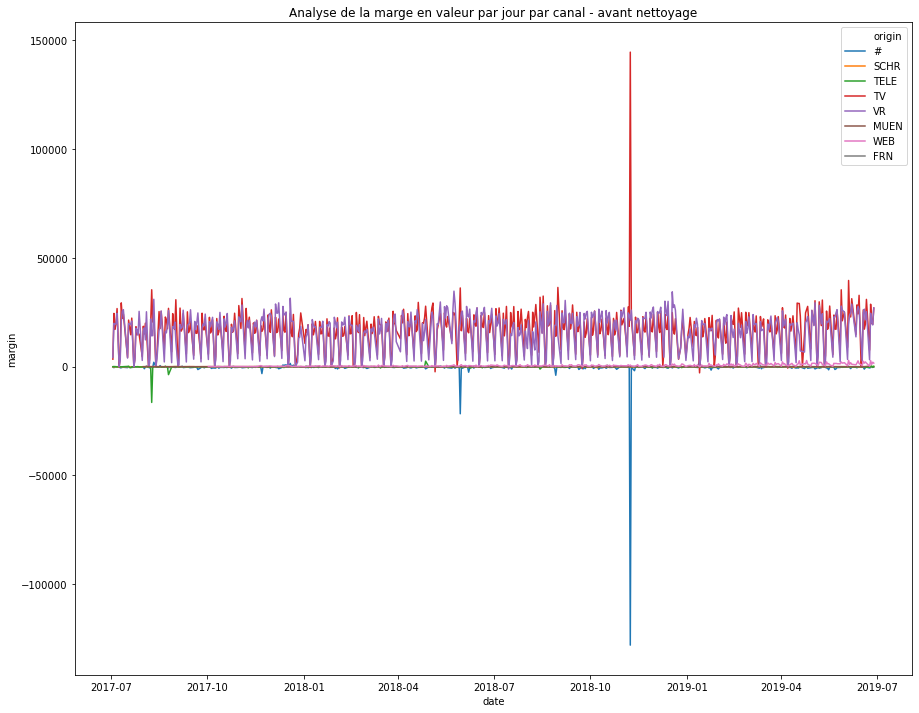

In [27]:
fig, ax = plt.subplots(figsize=(15, 12))
data_to_plot = (
data.groupby(['orgacom', 'date', 'origin'])['margin']
    .sum()
    .unstack('origin')
    .rolling(1)
    .mean()
    .stack('origin')
    .rename('margin')
    .reset_index()
)
sns.lineplot(data=data_to_plot, x='date', y='margin', hue='origin', ax=ax)
ax.set_title('Analyse de la marge en valeur par jour par canal - avant nettoyage')
# ax.set_xticklabels([])

On voit 3 gros pics négatifs qui sont des corrections d'erreur sur les prix, mais pas affectés au canal correspondant.

### Calcul d'une table des avoirs, aggrégée

In [28]:
mask_ZC = data.doctype.isin(['ZC10'])
mask_ZA = data.doctype.isin(['ZA01', 'ZA02'])
myfields = ['orgacom',
            'doctype',
            'date',
            'origin',
            'material',
            'client',
            'brutrevenue',
            'weight',
            'PMVK',
            'marginperkg',
            'margin',
            'purchcost',
            'purchcostperkg']

In [29]:
grouper_fields = ['orgacom', 'date', 'client', 'material']
raw_avoirs = data.loc[mask_ZA, grouper_fields + ['margin', 'brutrevenue', 'weight']].copy()
avoirs = raw_avoirs.groupby(grouper_fields, observed=True).sum()
avoirs

margin  brutrevenue  weight
orgacom date       client     material                                       
1ALO    2017-07-03 0000025193 000000000000040943  -39.60       -39.60   0.000
                   0000025786 000000000000087130  -10.32       -27.85  -3.098
                   0000157790 000000000000136507   -2.60       -14.50  -1.000
                   0000190365 000000000000004161   -4.82       -11.70  -5.220
                   0000208272 000000000000098587    0.44       -74.34  -5.460
...                                                  ...          ...     ...
        2019-06-28 0000216473 000000000000159678   -7.44        -7.44   0.000
                              000000000000172885  -14.25       -14.25   0.000
                              000000000000183026    0.00         0.00   0.000
                              000000000000194042   -9.18        -9.18   0.000
                   0000248706 000000000000176177   -1.27        -3.45  -0.500

[4983 rows x 3 columns]

On identifie ensuite les lignes de commandes qui ne sont pas dupliquées dans le dataset initial.

In [30]:
mask_dup_ZC = data.loc[mask_ZC].duplicated(grouper_fields, keep=False).rename('_duplicated')
print(f'Number of duplicated lines in orders: {sum(mask_dup_ZC)}')
mask_dup_ZC = mask_dup_ZC.reindex(data.index, fill_value=False)
data = (data.merge(mask_dup_ZC, how='left', left_index=True, right_index=True))

Number of duplicated lines in orders: 11469


On calcule les indicateurs à remplacer : 
  - correspondent à des commandes, dont les lignes ne sont pas dupliquées
  - ne font pas passer les poids ou les CA bruts négatifs

In [31]:
indicators = ['margin', 'weight', 'brutrevenue']
to_update = (
data.loc[~data._duplicated & mask_ZC, grouper_fields + indicators]
    .merge(avoirs, left_on=grouper_fields, right_index=True, validate='1:1')
)
for indicator in indicators:
    to_update[indicator] = to_update[indicator + '_x'] + to_update[indicator + '_y']
to_update = to_update.loc[(to_update.weight >= 0) & (to_update.brutrevenue >= 0)]
to_update.sample(5)

,orgacom,date,client,material,margin_x,weight_x,brutrevenue_x,margin_y,brutrevenue_y,weight_y,margin,weight,brutrevenue
1114829,1ALO,2018-10-02,0000119444,000000000000087371,23.46,48.00,119.6,-2.34,-11.96,-4.80,21.12,43.2,107.64
1594763,1ALO,2019-04-16,0000242996,000000000000138541,76.30,64.00,198.0,0.00,0.00,0.00,76.30,64.0,198.00
384748,1ALO,2017-12-06,0000195129,000000000000007446,10.50,30.00,81.0,-7.06,47.28,24.00,3.44,54.0,128.28
1228885,1ALO,2018-11-15,0000150718,000000000000004164,13.14,10.44,29.7,-13.14,-29.70,-10.44,0.00,0.0,0.00
1593116,1ALO,2019-04-12,0000082687,000000000000004161,5.06,5.22,11.7,-5.06,-11.70,-5.22,0.00,0.0,0.00


On contrôle que les quelques grosses lignes en erreur sont bien corrigées.

In [32]:
to_update.sort_values('margin_x', ascending=False).head(5)

,orgacom,date,client,material,margin_x,weight_x,brutrevenue_x,margin_y,brutrevenue_y,weight_y,margin,weight,brutrevenue
1213094,1ALO,2018-11-08,0000243129,000000000000026893,127569.14,150.000,127650.00,-127522.35,-127522.35,0.0,46.79,150.000,127.65
797279,1ALO,2018-05-30,0000117385,000000000000059292,21226.63,11.260,21394.00,-21214.40,-21214.40,0.0,12.23,11.260,179.60
89909,1ALO,2017-08-09,0000088269,000000000000176177,16377.72,2.000,16390.00,-16373.61,-16373.61,0.0,4.11,2.000,16.39
128640,1ALO,2017-08-25,0000142968,000000000000176770,3628.09,6.046,3657.83,-3618.53,-3618.53,0.0,9.56,6.046,39.30
856310,1ALO,2018-06-20,0000234068,000000000000004161,532.64,20.880,558.00,-502.20,-502.20,0.0,30.44,20.880,55.80


In [33]:
to_update.margin_y.sum()

-173767.21999999997

On retire les indicateurs temporaires : 

In [34]:
to_update.drop(columns=['margin_x', 'margin_y', 'weight_x', 'weight_y', 'brutrevenue_x', 'brutrevenue_y'], inplace=True)

Dans un premier temps, on travaille sur une copie : 

In [35]:
data2 = data.copy()

Suppression des avoirs :

In [36]:
data2 = data2.loc[(data2.merge(to_update, how='left', on=grouper_fields, indicator=True)._merge == 'left_only')
                  | ~data2.doctype.isin(['ZA01', 'ZA02'])]

Mise à jour des lignes de commande : 

In [37]:
merged = data2.merge(to_update, on=grouper_fields, how='left', indicator=True)

In [42]:
merged_mask_ZC = merged.doctype.isin(['ZC10',])
for indicator in indicators:
    merged.loc[:, indicator + '_z'] = merged[indicator + '_x'].where(merged[indicator + '_y'].isna() | ~merged_mask_ZC,
                                                                    merged[indicator + '_y'])
    
merged['margin_z'].sum()

17649546.76

Text(0.5, 1.0, 'Analyse de la marge en valeur par jour par canal - avant nettoyage')

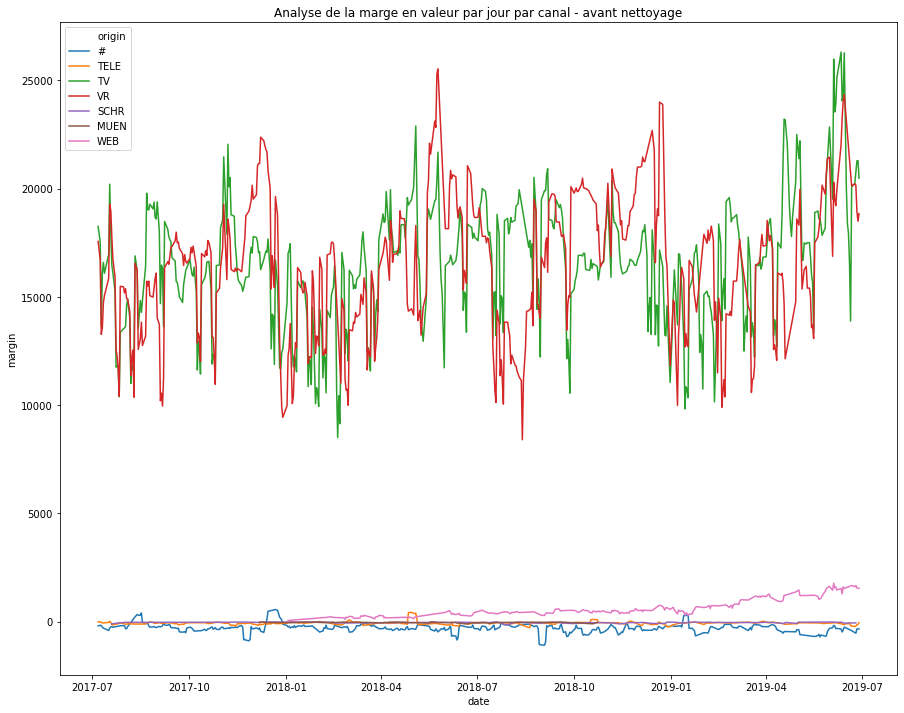

In [47]:
fig, ax = plt.subplots(figsize=(15, 12))
data_to_plot = (
merged.groupby(['orga<com', 'date', 'origin'])['margin_z']
    .sum()
    .unstack('origin')
    .rolling(5)
    .mean()
    .stack('origin')
    .rename('margin')
    .reset_index()
)
sns.lineplot(data=data_to_plot, x='date', y='margin', hue='origin', ax=ax)
ax.set_title('Analyse de la marge en valeur par jour par canal - avant nettoyage')
# ax.set_xticklabels([])

In [ ]:
to_update

In [143]:
data2.loc[data2.margin_z.isna(), grouper_fields + ['margin', 'margin_z', 'doctype']]

,orgacom,date,client,material,margin,margin_z,doctype
1798554,1ALO,2019-06-28,0000231954,000000000000019989,17.31,NaN,ZC10
1798555,1ALO,2019-06-28,0000231954,000000000000004743,38.62,NaN,ZC10
1798556,1ALO,2019-06-28,0000231954,000000000000031177,5.69,NaN,ZC10
1798557,1ALO,2019-06-28,0000231954,000000000000052567,29.88,NaN,ZC10
1798558,1ALO,2019-06-28,0000231954,000000000000183022,2.36,NaN,ZC10
...,...,...,...,...,...,...,...
1799117,1ALO,2019-06-28,0000184895,000000000000004174,36.20,NaN,ZC10
1799119,1ALO,2019-06-28,0000202142,000000000000062052,1.53,NaN,ZC10
1799120,1ALO,2019-06-28,0000213492,000000000000016816,21.60,NaN,ZC10
1799121,1ALO,2019-06-28,0000227381,000000000000014463,16.49,NaN,ZC10


In [148]:
data.loc[(data.client == '0000024113') &
         (data.material == '000000000000025605') &
         (data.date >= '01-01-2018') &
         (data.date <= '31-12-2018'), myfields].sort_values('date')

,doctype,date,origin,material,client,brutrevenue,weight,PMVK,marginperkg,margin,purchcost,purchcostperkg
448964,ZC10,2018-01-05,VR,000000000000025605,0000024113,115.65,75.0,1.542000,0.28,21.31,94.34,1.257867
453052,ZC10,2018-01-07,VR,000000000000025605,0000024113,0.00,0.0,NaN,0.00,40.51,-40.51,-inf
453053,ZR01,2018-01-07,#,000000000000025605,0000024113,0.00,0.0,NaN,0.00,-2.10,2.10,inf
461784,ZC10,2018-01-11,VR,000000000000025605,0000024113,77.10,50.0,1.542000,0.28,14.20,62.90,1.258000
477731,ZC10,2018-01-18,VR,000000000000025605,0000024113,96.38,62.5,1.542080,0.28,17.51,78.87,1.261920
494011,ZC10,2018-01-25,VR,000000000000025605,0000024113,154.20,100.0,1.542000,0.28,28.15,126.05,1.260500
510118,ZC10,2018-02-01,VR,000000000000025605,0000024113,96.38,62.5,1.542080,0.28,17.60,78.78,1.260480
526881,ZC10,2018-02-08,VR,000000000000025605,0000024113,192.75,125.0,1.542000,0.27,34.31,158.44,1.267520
552737,ZC10,2018-02-20,TV,000000000000025605,0000024113,231.30,150.0,1.542000,0.28,41.59,189.71,1.264733
570631,ZC10,2018-02-27,VR,000000000000025605,0000024113,154.20,100.0,1.542000,0.28,28.20,126.00,1.260000


array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

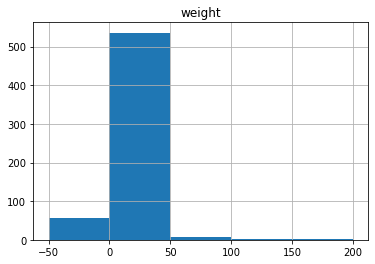

In [145]:
temp.hist('weight', bins=[-50, 0, 50, 100, 150, 200 ])

In [73]:
raw_data.loc[mask_ZA & (raw_data.date == '2017-07-03') & (raw_data.material == '000000000000040943'), myfields]

,doctype,date,origin,material,client,brutrevenue,weight,PMVK,marginperkg,margin,purchcost,purchcostperkg
716,ZA01,2017-07-03,SCHR,000000000000040943,0000025193,-39.6,0.0,-inf,0.0,0.0,-39.6,-inf


In [76]:
raw_data.date.describe()

<ipython-input-76-8f12b0b313a7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_data.date.describe()


count                 1799123
unique                    542
top       2019-05-28 00:00:00
freq                     6387
first     2017-07-03 00:00:00
last      2019-06-28 00:00:00
Name: date, dtype: object

In [75]:
raw_data.loc[mask_ZA & (raw_data.weight == 0), myfields]

,doctype,date,origin,material,client,brutrevenue,weight,PMVK,marginperkg,margin,purchcost,purchcostperkg
716,ZA01,2017-07-03,SCHR,000000000000040943,0000025193,-39.60,0.0,-inf,0.0,0.0,-39.60,-inf
1913,ZA01,2017-07-04,TELE,000000000000091965,0000025575,-17.69,0.0,-inf,0.0,0.0,-17.69,-inf
14994,ZA01,2017-07-07,#,000000000000008231,0000025874,-11.85,0.0,-inf,0.0,0.0,-11.85,-inf
19509,ZA02,2017-07-09,SCHR,000000000000007417,0000026328,0.00,0.0,NaN,0.0,0.0,0.00,NaN
19639,ZA01,2017-07-09,#,000000000000061392,0000126090,0.00,0.0,NaN,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1797631,ZA01,2019-06-28,#,000000000000026120,0000216473,0.00,0.0,NaN,0.0,0.0,0.00,NaN
1797632,ZA01,2019-06-28,#,000000000000085635,0000216473,-21.60,0.0,-inf,0.0,0.0,-21.60,-inf
1797633,ZA01,2019-06-28,#,000000000000054549,0000216473,-5.04,0.0,-inf,0.0,0.0,-5.04,-inf
1797634,ZA01,2019-06-28,#,000000000000159678,0000216473,-7.44,0.0,-inf,0.0,0.0,-7.44,-inf


In [69]:
grouped_avoirs = (
    raw_data.loc[mask_ZA, ['date', 'material', 'client', 'weight', 'brutrevenue', 'margin', 'purchcost']]
            .groupby(['date', 'material', 'client'])
            .sum()
)
grouped_avoirs

weight  brutrevenue    margin  \
date       material           client                                      
2017-07-03 000000000000004161 0000190365  -5.220       -11.70  -4.80240   
           000000000000040161 0000214415  -1.500       -14.70  -1.42500   
           000000000000040943 0000025193   0.000       -39.60   0.00000   
           000000000000064657 0000214415  -2.880       -34.85  -5.18400   
           000000000000087130 0000025786  -3.098       -27.85 -10.31634   
...                                          ...          ...       ...   
2019-06-28 000000000000176177 0000248706  -0.500        -3.45  -1.27000   
           000000000000177205 0000180636  -5.000       -30.50  -9.40000   
           000000000000183026 0000216473   0.000         0.00   0.00000   
           000000000000193565 0000207201   0.000        -2.20   0.00000   
           000000000000194042 0000216473   0.000        -9.18   0.00000   

                                          purchcost  
date       material           client                 
2017-07-03 000000000000004161 0000190365   -6.89760  
           000000000000040161 0000214415  -13.27500  
           000000000000040943 0000025193  -39.60000  
           000000000000064657 0000214415  -29.66600  
           000000000000087130 0000025786  -17.53366  
...                                             ...  
2019-06-28 000000000000176177 0000248706   -2.18000  
           000000000000177205 0000180636  -21.10000  
           000000000000183026 0000216473    0.00000  
           000000000000193565 0000207201   -2.20000  
           000000000000194042 0000216473   -9.18000  

[4983 rows x 4 columns]

In [66]:
raw_data.loc[mask_ZA].loc[raw_data.loc[mask_ZA].duplicated(['date', 'client', 'material'], keep=False), myfields].iloc[0:30]

,doctype,date,origin,material,client,brutrevenue,weight,PMVK,marginperkg,margin,purchcost,purchcostperkg
827,ZA01,2017-07-03,TELE,000000000000098587,0000208272,99.83,5.460,18.283883,4.59,25.06140,74.76860,13.693883
828,ZA01,2017-07-03,TELE,000000000000098587,0000208272,-174.17,-10.920,15.949634,2.25,-24.57000,-149.60000,13.699634
30478,ZA01,2017-07-12,TELE,000000000000153987,0000201422,21.00,0.924,22.727273,4.68,4.32432,16.67568,18.047273
30479,ZA01,2017-07-12,TELE,000000000000153987,0000201422,-30.00,-0.924,32.467532,14.42,-13.32408,-16.67592,18.047532
36396,ZA01,2017-07-17,#,000000000000008231,0000123646,49.90,10.000,4.990000,1.43,14.30000,35.60000,3.560000
36399,ZA01,2017-07-17,#,000000000000042456,0000123646,48.60,12.000,4.050000,0.90,10.80000,37.80000,3.150000
36403,ZA01,2017-07-17,#,000000000000042456,0000123646,-54.00,-12.000,4.500000,1.35,-16.20000,-37.80000,3.150000
36404,ZA01,2017-07-17,#,000000000000008231,0000123646,-53.50,-10.000,5.350000,1.79,-17.90000,-35.60000,3.560000
36705,ZA01,2017-07-17,#,000000000000041287,0000026182,16.35,1.000,16.350000,-1.17,-1.17000,17.52000,17.520000
36709,ZA01,2017-07-17,#,000000000000041287,0000026182,-22.95,-1.000,22.950000,5.43,-5.43000,-17.52000,17.520000


In [59]:
raw_data.loc[[827, 828]]

,order_num,orgacom,month,week,date,pricetype_x,client,doctype,origin,salesgroup,...,pilcom,hier4,hier3,hier2,hier1,margin,purchcost,purchcostperkg,PMVK,marginpercent
827,83,1ALO,201707,201727,2017-07-03,ZTG,0000208272,ZA01,TELE,H21,...,RGL,10320,10321,10322,208469,25.0614,74.7686,13.693883,18.283883,0.251041
828,83,1ALO,201707,201727,2017-07-03,ZTM,0000208272,ZA01,TELE,H21,...,RGL,10320,10321,10322,208469,-24.5700,-149.6000,13.699634,15.949634,0.141069


In [56]:
raw_data.loc[mask_ZA].merge(raw_data.loc[mask_ZC],
                            how='left',
                            indicator=True, 
                            validate='1:1',
                            on=['date', 'client', 'material', 'salesgroup', 'pricetype_x']
                           )

MergeError: Merge keys are not unique in either left or right dataset; not a one-to-one merge

## Calcul de nouveaux indicateurs sur les lignes de vente
### Calcul des indicateurs

In [ ]:
data['margin'] = data.marginperkg * data.weight
data['purchcost'] = data.brutrevenue - data.margin
data['purchcostperkg'] = data.purchcost / data.weight
data['PMVK'] = data.brutrevenue / data.weight
data['marginpercent'] = (data.margin / data.brutrevenue).replace({np.inf: np.nan, -np.inf: np.nan})
data.sample(5)

### Identification des outliers

In [ ]:
data.describe()

Après analyse, il apparaît qu'il n'y a pas d'erreur sur les poids.

TO BE CONTINUED

## Construction de la table des commandes

In [ ]:
data.columns

In [ ]:
agg_funcs = {
    ''
}

In [ ]:
orders = data.groupby('order_num')

In [ ]:
data.pivot_table(values='material', index='doctype', columns='origin', aggfunc='count')

# Analyse
## Progression du Web au fil du temps
### En nombre de lignes

In [ ]:
test.loc[test.weight < 0].groupby('doctype').size()

In [ ]:
test = (
raw_data.loc[raw_data.doctype.isin(invalid_doctypes),
             ['date', 'client', 'doctype', 'material', 'origin', 'weight', 'brutrevenue', 'marginperkg']]
)
test['margin'] = test['marginperkg'] * test['weight']
test.groupby(['origin', 'doctype']).size().unstack('origin')

In [ ]:
raw_data.loc[raw_data.doctype.isin(invalid_doctypes), ['weight', 'material', 'client']].describe(include='all')

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
data_to_plot = (
    data.loc[:, ['origin', 'date', 'margin']]
        .groupby(['origin', 'date'], observed=True)
        .sum()
        .unstack('origin', fill_value=0)
        .rolling(1)
        .mean()
)
data_to_plot.plot(kind='line', ax=ax)

In [ ]:
data.loc[data.margin == data.margin.max(), ['date', 'material', 'client', 'brutrevenue', 'weight', 'marginperkg', 'margin']]

In [ ]:
avoirs = raw_data.loc[raw_data.doctype.isin(['ZA01', 'ZA02'])]
commandes = raw_data.loc[raw_data.doctype.isin(['ZC10', 'ZC01', 'ZC02'])]

In [ ]:
avoirs.merge(commandes, 
             on=['week', 'client', 'material'],
             how='left',
             indicator=True,
#              validate='1:1',
             ).loc[lambda x: x['_merge'] == 'left_only']

In [ ]:
raw_data.sort_values('margin', ascending=False)[['doctype', 'date', 'origin', 'material', 'client', 'brutrevenue', 'weight', 'marginperkg', 'margin']]

In [49]:
myfields = ['doctype', 'date', 'origin', 'material', 'client', 'brutrevenue', 'weight', 'marginperkg', 'margin']
(
raw_data.loc[raw_data.doctype == 'ZA03', fields]
#         .loc[raw_data.weight > 0.]
)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['pricetype'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
raw_data['margin'] = raw_data.marginperkg * raw_data.weight

In [ ]:
fig, ax = plt.subplots(nrows=1, figsize=(12, 8))
(
data.groupby(['origin', 'date', 'brutrevenue', 'margin', 'weight'], observed=True)
     .agg('sum')
     .unstack('origin', fill_value=0)
     .rolling(20)
     .mean()
     .plot(kind='line', ax=ax)
)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
(
data.loc[data.origin.isin(['#', 'TV', 'WEB', 'VR'])]
    .pivot_table(aggfunc='size', columns='origin', index='week')
    .plot(kind='bar', stacked=True, legend=False, ax=ax)
)

In [ ]:
plot_data = (
data.loc[data.origin.isin(['#', 'TV', 'WEB', 'VR'])]
    .groupby(['month', 'origin'], observed=True)
    .size()
    .rename('line_count')
    .reset_index()
    .pivot_table(columns='origin')
)
fig, ax = plt.subplots(figsize=(8,5))
# plt.bar(x=plot_data.month, height=plot_data.line_count, )#hue=plot_data.origin)
plot_data.plot(x='month', y='line_count', kind='bar', stacked=True, ax=ax)

In [ ]:
(data.loc[data.doctype.isin(['ZC10', 'ZC01'])]
     .groupby('origin', observed=True)
     .mean())

In [ ]:
orders = (
data.loc[data.doctype.isin(['ZC10']) & (data.weight != 0)]
    .groupby(['date', 'origin', 'client'],
             observed=True,
            )
    .agg ({'brutrevenue': 'sum',
           'weight': 'sum', 
           'margin': 'sum',
           'material': 'count',
          })
    .rename({'material': 'linecount'}, axis=1)
)
orders

In [ ]:
orders['marginperkg'] = orders.margin / orders.weight
orders

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
(
orders.groupby(['origin', 'date'], observed=True)['margin']
      .sum()
      .unstack('origin', fill_value=0)
      .rolling(20)
      .mean()
      .plot(kind='line', ax=ax)
)

In [ ]:
(orders.groupby(['origin', 'date'], observed=True)['margin']
      .sum()
      .idxmax()
)

In [ ]:
(data.loc[data.date == '2018-11-08', ]
     .sort_values(ascending=False, by='margin')
     .head(10)
)

In [ ]:
(
data.loc[data.origin.isin(['VR', 'TV', 'WEB']) & data.doctype.isin(['ZC10'])]
    .groupby(['orgacom_x', 'date', 'client', 'origin'], observed=True)
    .size()
    .reset_index()
    .groupby(['date', 'orgacom_x', 'client'], observed=True)
    .size()
    .loc[lambda x: x>1]
)

In [ ]:
smol_data = data.loc[data.date >= '2019-06-01']
smol_data

In [ ]:
smol_data.loc[smol_data.origin.isin(['TV', 'WEB', 'VR'])]

In [ ]:
order_count = (
smol_data.loc[smol_data.origin.isin(['TV', 'WEB', 'VR']), ['orgacom_x', 'date', 'client', 'origin']]
         .drop_duplicates()
         .groupby(['orgacom_x', 'date', 'client'], observed=True)
         .size()
         .loc[lambda x: x>1]
         .rename('order_count')
)
order_count

In [ ]:
web_orders = (
smol_data.loc[smol_data.origin.isin(['WEB']), ['orgacom_x', 'date', 'client']]
         .drop_duplicates()
)
web_orders

In [ ]:
(smol_data.merge(web_orders.set_index(['orgacom_x', 'date', 'client']),
                on=['orgacom_x', 'date', 'client'],
                how='left', 
                indicator=True
               ).loc[lambda x: x._merge=='both']
                .drop('_merge', axis=1)
                .merge(order_count.reset_index(), 
                       how='left', 
                       on=['orgacom_x', 'date', 'client'],
                       indicator=True)
                .loc[lambda x: x._merge == 'both', ['orgacom_x', 'date', 'client']]
                .drop_duplicates()
)

In [ ]:
smol_data.loc[(smol_data.client == '0000024852') & (smol_data.date == '2019-06-07'), ['material', 'weight'] ]

In [ ]:
temp = (
smol_data.loc[smol_data.origin.isin(['TV', 'WEB', 'VR']), ['orgacom_x', 'date', 'client', 'origin', 'week']]
         .groupby(['orgacom_x', 'date', 'client', 'origin'], observed=True)
         .transform(lambda x: x.size)
         .rename({'week': 'counts'}, axis=1)
         .join(smol_data)[['orgacom_x', 'date', 'client', 'origin']]
         .groupby(['orgacom_x', 'date', 'client'], observed=True)
         .transform(lambda x: x.size)

)
temp

In [ ]:
temp = (
data.loc[data.origin.isin(['TV', 'WEB', 'VR']), ['orgacom_x', 'date', 'client', 'origin']]
    .groupby(['orgacom_x', 'date', 'client', 'origin'], observed=True)
    .transform(lambda x: x.size)
#     .groupby(['orgacom_x', 'date', 'client'], observed=True)
#     .transform(lambda x: x.size)
)
temp

In [ ]:
temp.columns

In [ ]:
data.sort_index()#.loc[data.origin.isin(['TV', 'WEB', 'VR'])]

In [ ]:
temp.loc[lambda x: x]

In [ ]:
temp.name = 'filter'

In [ ]:
(
data.merge(temp, left_index=True, right_index=True).loc[lambda x: x['filter']]
    .loc[data.date >= '01-06-2019']
)